In [1]:
import pandas as pd

In [2]:
Movies = pd.read_csv("Movie-Ratings.csv")

In [3]:
len(Movies)

559

In [4]:
Movies.head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [5]:
Movies.columns = ["Film", "Genre", "CriticRating", "AudienceRating", "BudgetMillions", "Year"]

In [6]:
Movies.head(10)

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [7]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [8]:
Movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [9]:
Movies.Film = Movies.Film.astype("category")

In [10]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [11]:
Movies.Genre = Movies.Genre.astype("category")

In [12]:
Movies.Year = Movies.Year.astype("category")

In [13]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [14]:
Movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [15]:
Movies.describe()

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Jointplots

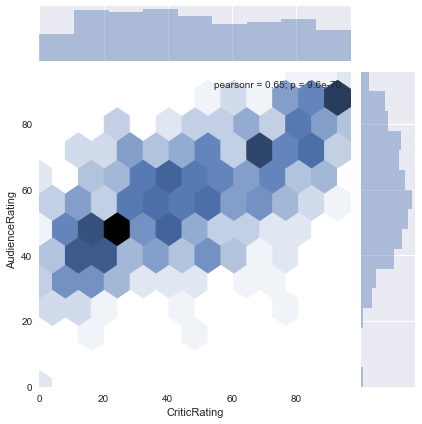

In [18]:
j = sns.jointplot(data = Movies, x = "CriticRating", y = "AudienceRating", kind = "hex")

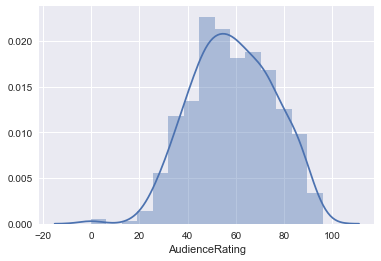

In [19]:
m1 = sns.distplot(Movies.AudienceRating, bins = 15)

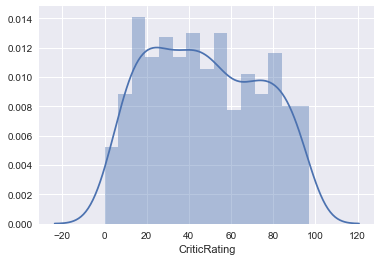

In [20]:
m1 = sns.distplot(Movies.CriticRating, bins = 15)

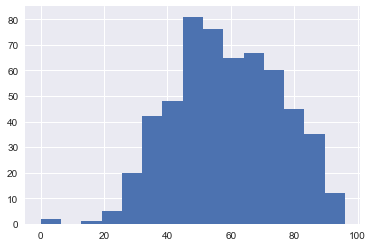

In [21]:
n1 = plt.hist(Movies.AudienceRating, bins = 15)

In [22]:
sns.set(style="ticks")

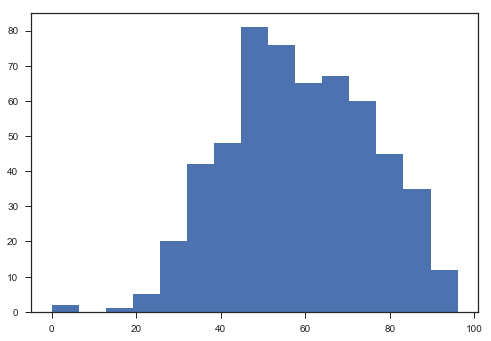

In [23]:
n1 = plt.hist(Movies.AudienceRating, bins = 15)

In [24]:
#Stacked Histograms

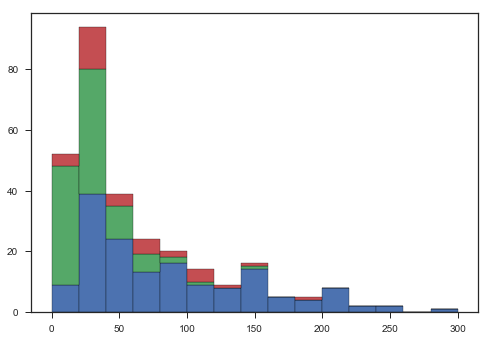

In [25]:
plt.hist([Movies[Movies.Genre == "Action"].BudgetMillions, \
          Movies[Movies.Genre == "Drama"].BudgetMillions, \
          Movies[Movies.Genre == "Thriller"].BudgetMillions], \
         edgecolor = "black", bins = 15, stacked = True)
plt.show()

In [26]:
HistogramDataList = []
HistogramLabels = []
for MovieGenre in Movies.Genre.cat.categories:
    HistogramDataList.append(Movies[Movies.Genre == MovieGenre].BudgetMillions)
    HistogramLabels.append(MovieGenre)

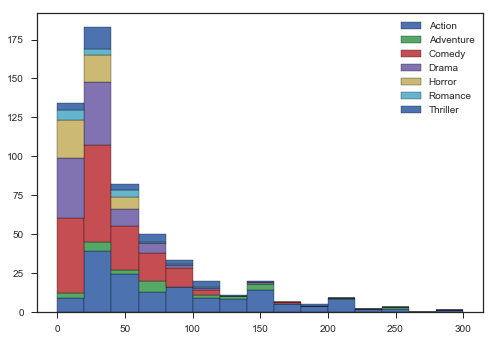

In [27]:
plt.hist(HistogramDataList, edgecolor = "black", bins = 15, stacked = True, rwidth = 1, label = HistogramLabels)
plt.legend()
plt.show()

In [28]:
# KDE plot

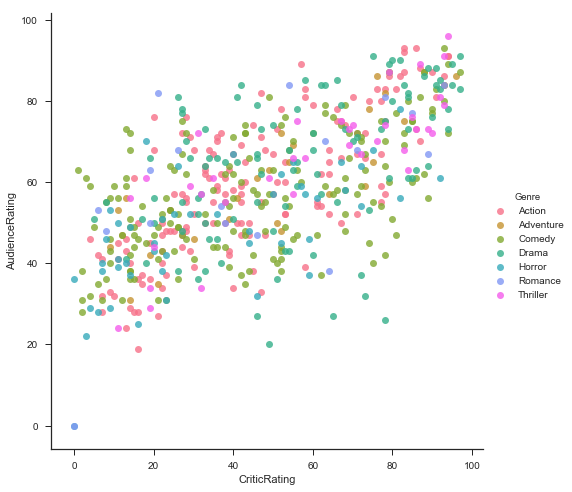

In [29]:
vis1 = sns.lmplot(data = Movies, x = "CriticRating", y = "AudienceRating", \
                 fit_reg = False, hue = "Genre", size = 7)

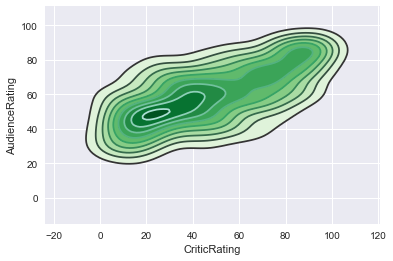

In [54]:
k1 = sns.kdeplot(data = Movies.CriticRating, data2 = Movies.AudienceRating, \
                shade = True, shade_lowest = False, cmap = "Greens")
k2 = sns.kdeplot(data = Movies.CriticRating, data2 = Movies.AudienceRating)

In [31]:
# Working with Subplots()

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

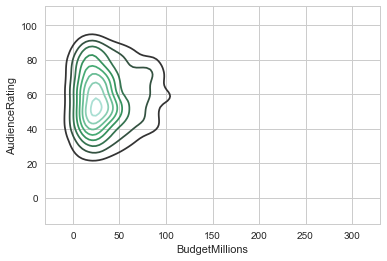

In [33]:
sns.set_style("whitegrid")
k1 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.AudienceRating)

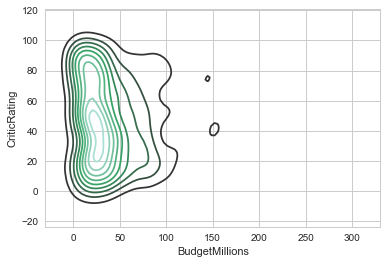

In [34]:
k2 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.CriticRating)

[(-20, 170)]

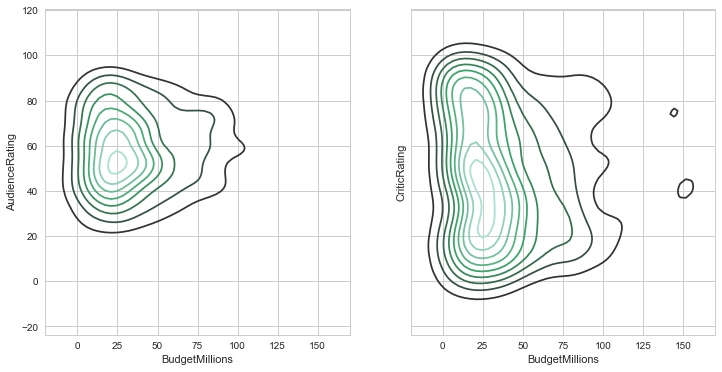

In [35]:
(f, axes) = plt.subplots(1, 2, figsize = (12, 6), sharex = True, sharey = True)
k1 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.AudienceRating, ax = axes[0])
k2 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.CriticRating, ax = axes[1])
k1.set(xlim = (-20, 170))

In [36]:
# ViolinPlots

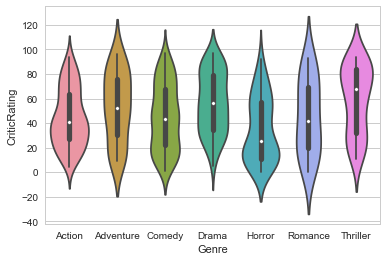

In [37]:
vplot = sns.violinplot(data = Movies, x = "Genre", y = "CriticRating")

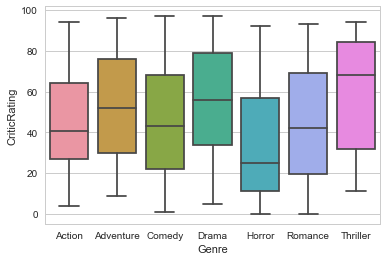

In [38]:
vplot = sns.boxplot(data = Movies, x = "Genre", y = "CriticRating")

In [39]:
# Facet Grid

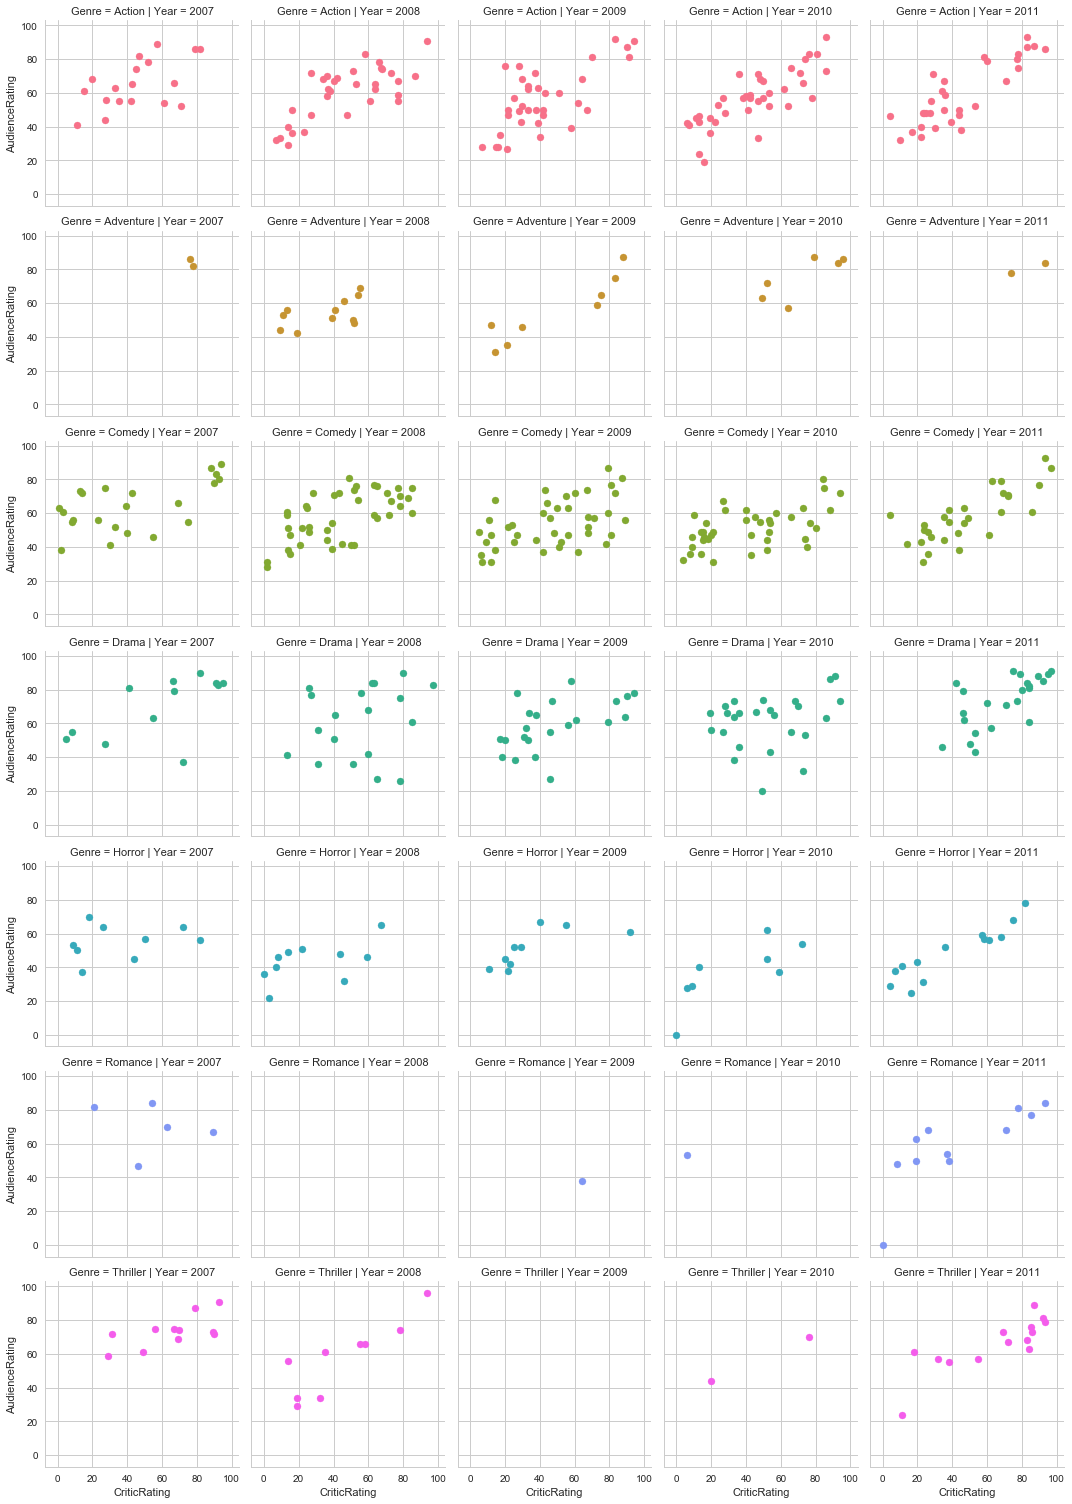

In [40]:
g = sns.FacetGrid(data = Movies, row = "Genre", col = "Year", hue = "Genre")
g = g.map(plt.scatter, "CriticRating", "AudienceRating")

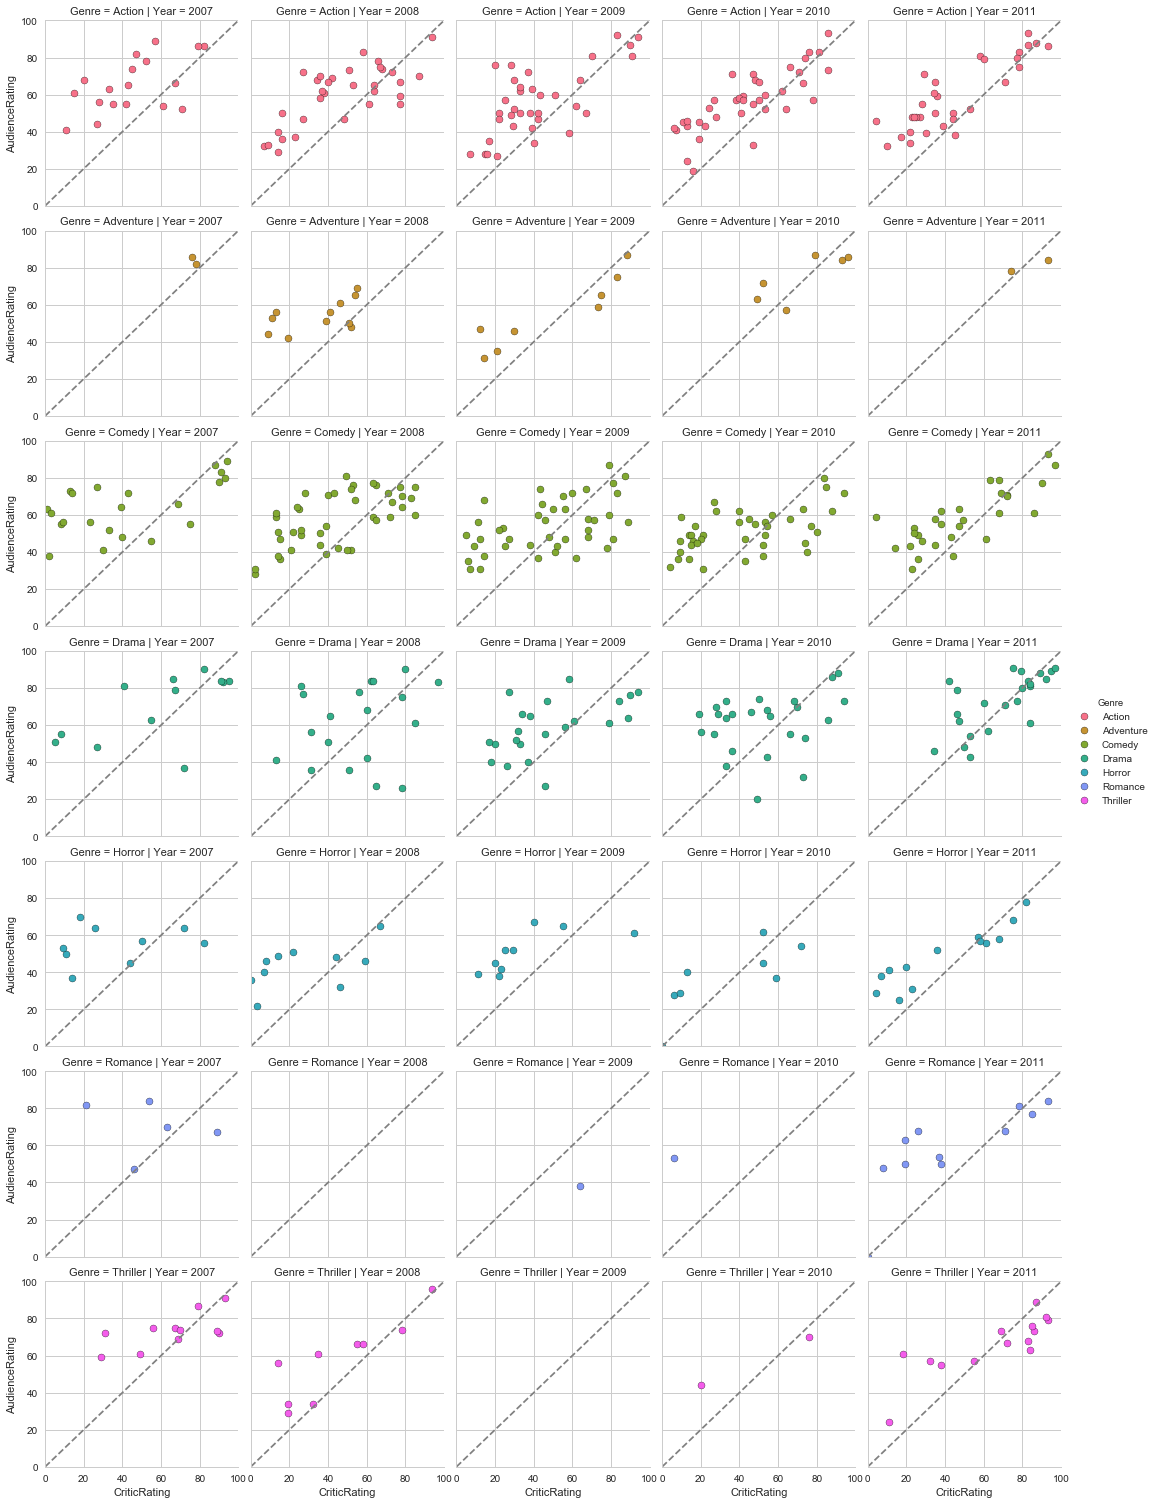

In [41]:
g = sns.FacetGrid(data = Movies, row = "Genre", col = "Year", hue = "Genre")
kws = dict(edgecolor = "black")
g = g.map(plt.scatter, "CriticRating", "AudienceRating", **kws)
g.set(xlim = (0, 100), ylim = (0, 100))

for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c = "gray", ls = "--")

g.add_legend()

In [42]:
# Building Dashboards

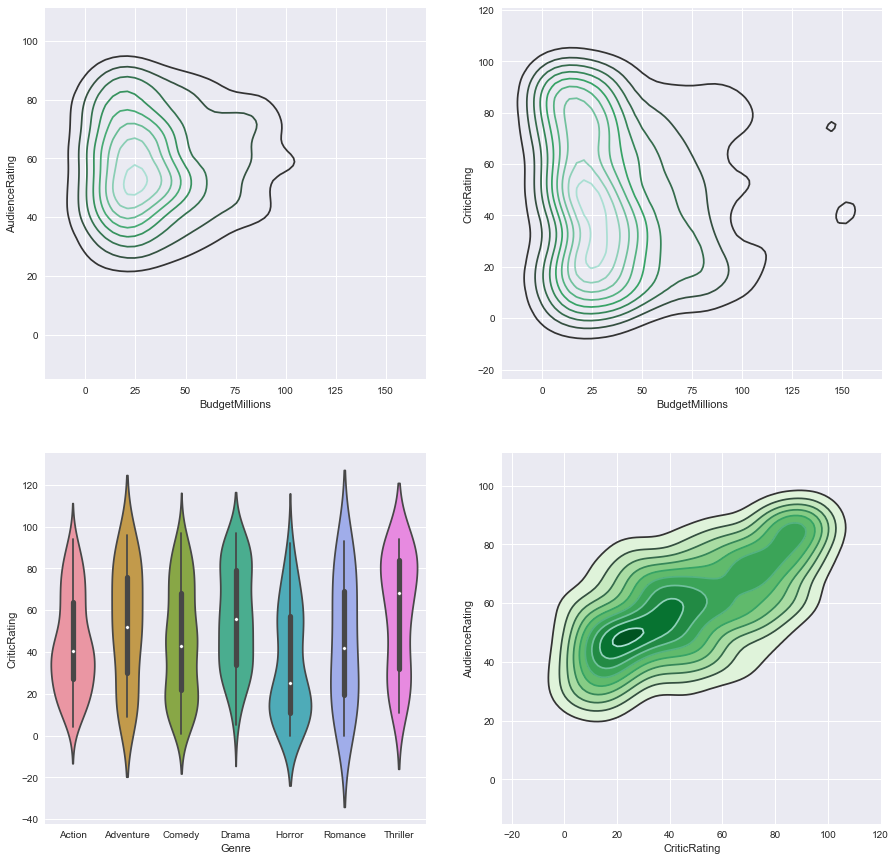

In [61]:
sns.set_style("darkgrid")
(f, axes) = plt.subplots(2, 2, figsize = (15, 15))
k1 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.AudienceRating, ax = axes[0, 0])
k2 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.CriticRating, ax = axes[0, 1])
v3 = sns.violinplot(data = Movies, x = "Genre", y = "CriticRating", ax = axes[1, 0])

k4 = sns.kdeplot(data = Movies.CriticRating, data2 = Movies.AudienceRating, \
                shade = True, shade_lowest = False, cmap = "Greens", ax = axes[1, 1])
k41 = sns.kdeplot(data = Movies.CriticRating, data2 = Movies.AudienceRating, ax = axes[1, 1])

k1.set(xlim = (-20, 170))
k2.set(xlim = (-20, 170))
plt.show()

In [62]:
# Styling Dashboards

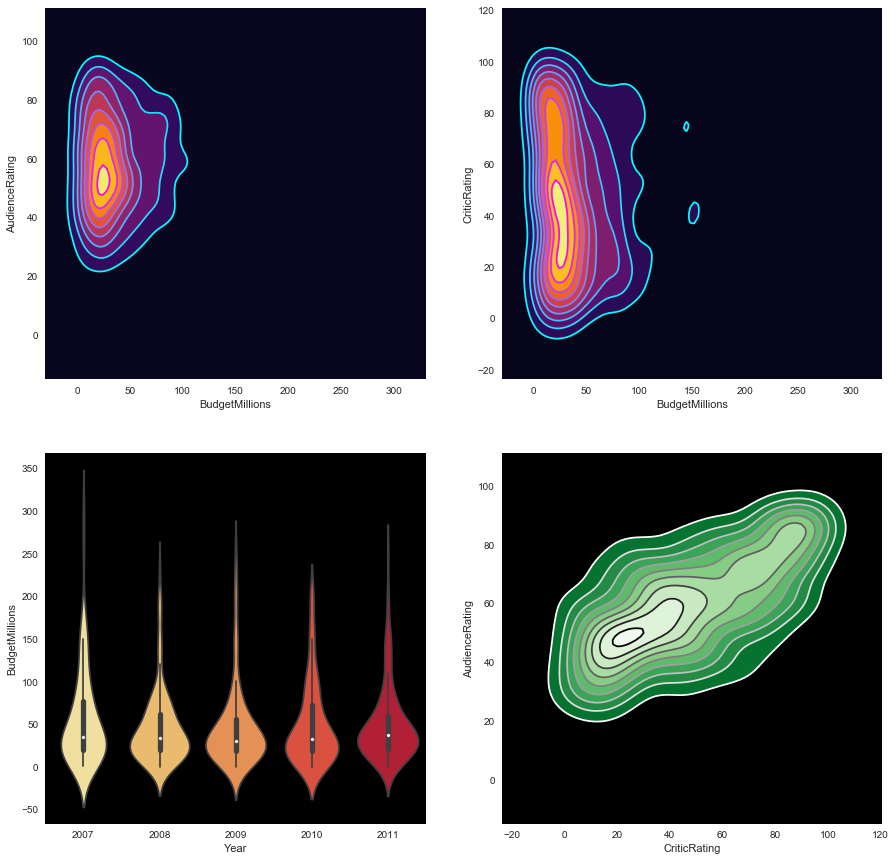

In [92]:
sns.set_style("dark", {"axes.facecolor" : "black"})
(f, axes) = plt.subplots(2, 2, figsize = (15, 15))

# Plot [0, 0]
k1_1 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.AudienceRating, \
                 shade = True, shade_lowest = True, cmap = "inferno", ax = axes[0, 0])#ocean
k1_2 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.AudienceRating, \
                 cmap = "cool", ax = axes[0, 0])

# Plot [0, 1]
k2_1 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.CriticRating, \
                 shade = True, shade_lowest = True, cmap = "inferno", ax = axes[0, 1])#ocean
k2_2 = sns.kdeplot(data = Movies.BudgetMillions, data2 = Movies.CriticRating, \
                 cmap = "cool", ax = axes[0, 1])

# Plot [1, 0]
v3_1 = sns.violinplot(data = Movies, x = "Year", y = "BudgetMillions", \
                      shade = True, shade_lowest = True, \
                      palette = "YlOrRd", ax = axes[1, 0])

# Plot [1, 1]
k4_1 = sns.kdeplot(data = Movies.CriticRating, data2 = Movies.AudienceRating, \
                shade = True, shade_lowest = False, cmap = "Greens_r", ax = axes[1, 1])
k4_2 = sns.kdeplot(data = Movies.CriticRating, data2 = Movies.AudienceRating, \
                   cmap = "gist_gray_r", ax = axes[1, 1])

k1.set(xlim = (-20, 170))
k2.set(xlim = (-20, 170))
plt.show()

In [97]:
# Thematic edits

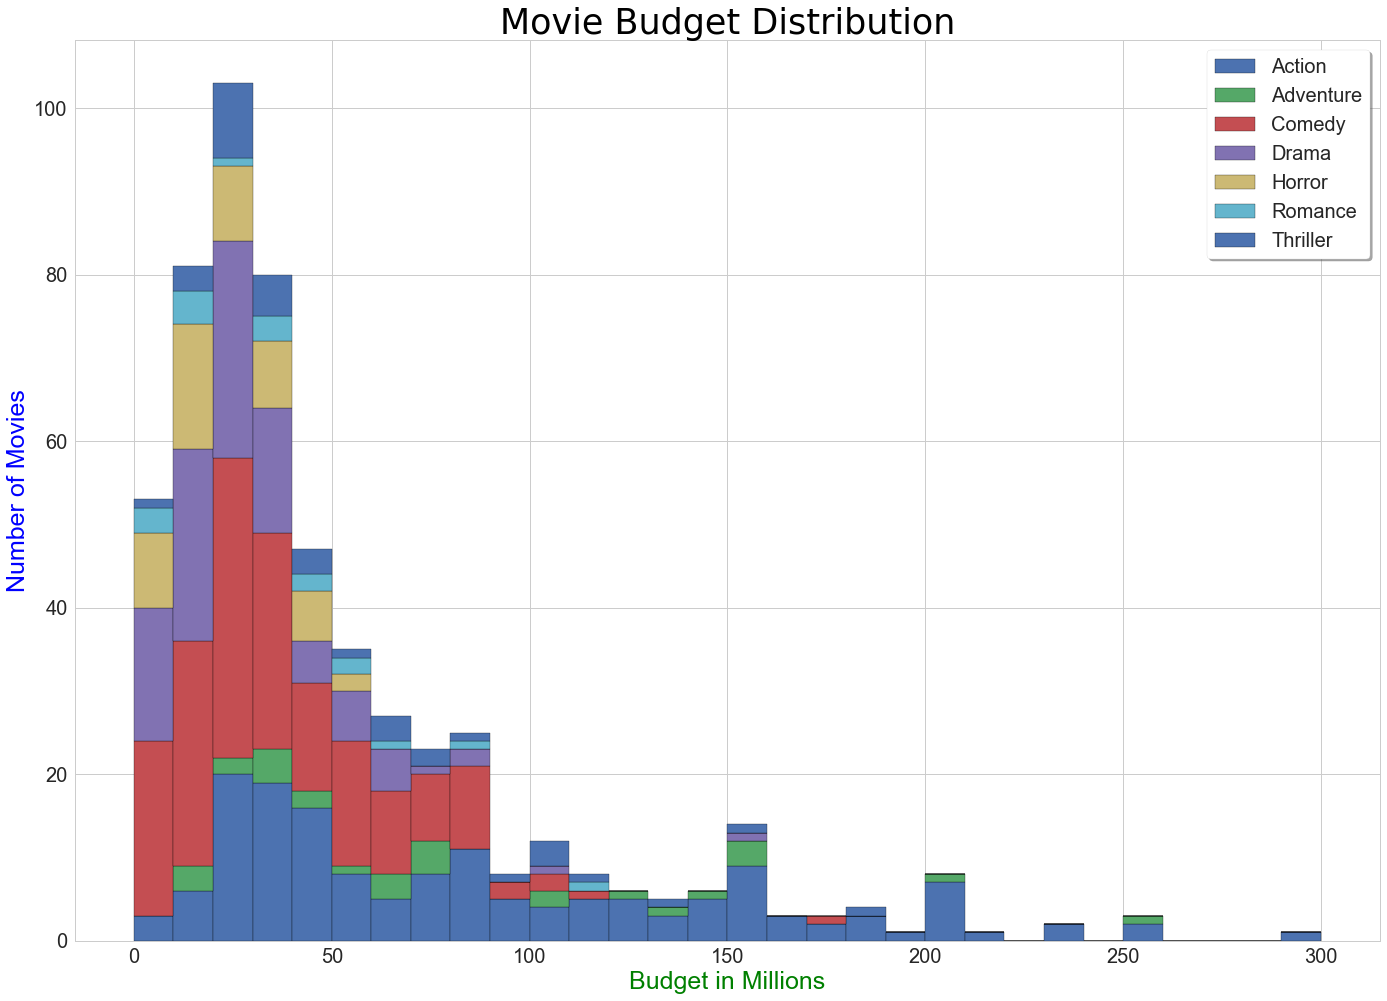

In [121]:
HistogramDataList = []
HistogramLabels = []
for MovieGenre in Movies.Genre.cat.categories:
    HistogramDataList.append(Movies[Movies.Genre == MovieGenre].BudgetMillions)
    HistogramLabels.append(MovieGenre)

sns.set_style("whitegrid")
(fig, ax) = plt.subplots()
fig.set_size_inches(23.4, 16.57)
h = plt.hist(HistogramDataList, edgecolor = "black", bins = 30, stacked = True, \
             rwidth = 1, label = HistogramLabels)
plt.title("Movie Budget Distribution", fontsize = 35,  \
         color = "Black", fontname = "Console")
plt.xlabel("Budget in Millions", fontsize = 25, color = "Green")
plt.ylabel("Number of Movies", fontsize = 25, color = "Blue")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(frameon = True, fancybox = True, shadow = True, framealpha = 1, \
           prop = {"size" : 20})
plt.show()